# CRAT: A Multi-Agent Framework for Causality-Enhanced Reflective and Retrieval-Augmented Translation





CRAT (Causality-Enhanced Reflective and Retrieval-Augmented Translation) is a multi-agent framework designed to enhance machine translation by addressing ambiguities and improving the accuracy of translations. By detecting, clarifying, and translating ambiguous terms, CRAT leverages both internal and external knowledge sources to ensure contextually appropriate term usage. The framework employs a judge agent to validate information, ensuring that translations align with the intended context, ultimately delivering precise and consistent outputs.



## Key Features of CRAT



- **Ambiguity Detection**: CRAT identifies ambiguous terms within the input text, allowing for targeted clarification before translation.

- **Knowledge Graph Integration**: Combines internal knowledge with external sources to capture contextual information, enhancing the accuracy of term usage in translations.

- **Causality Validation**: A dedicated judge agent validates the information retrieved, ensuring that translations are contextually aligned and accurate.

- **Refined Output Generation**: By using validated knowledge, CRAT produces high-quality translations that are both precise and contextually relevant.



## How CRAT Works


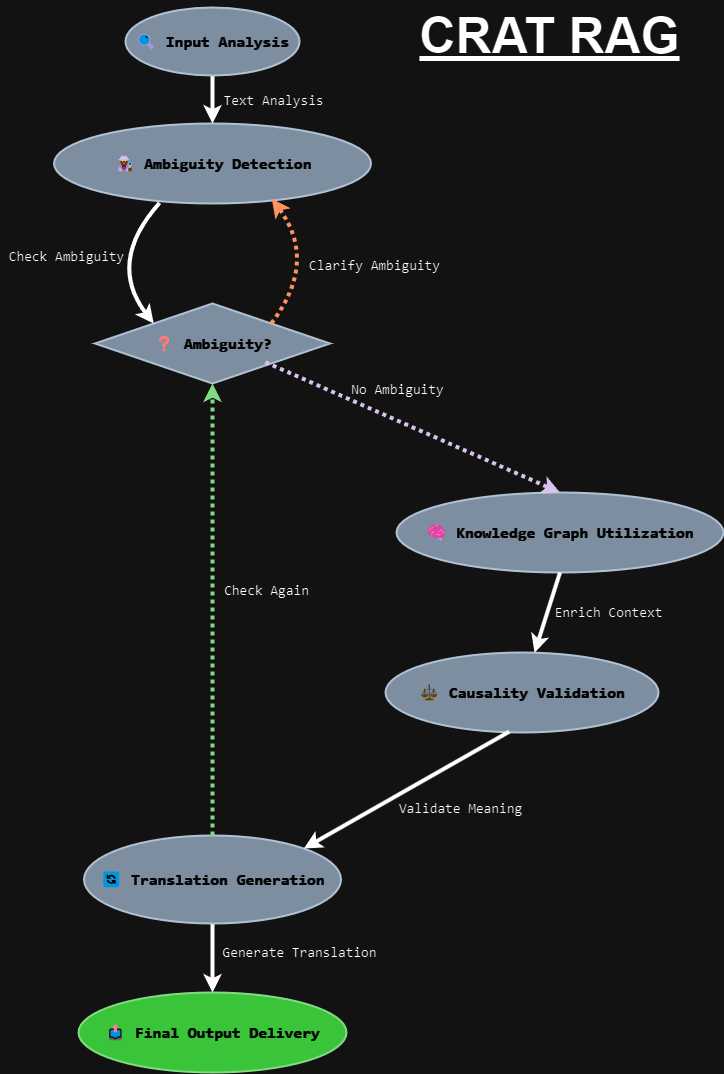


1. **Input Analysis**:
   - When a text is submitted for translation, CRAT begins by analyzing it to identify any ambiguous terms or phrases that may require clarification.

2. **Ambiguity Detection**:
   - The system employs an Unknown Terms Identification agent to detect terms that lack clear definitions or context within the input text.

3. **Knowledge Graph Utilization**:
   - The Knowledge Graph Constructor agent retrieves relevant information about ambiguous terms from both internal databases and external sources.
   - This step enriches the contextual understanding necessary for accurate translation.

4. **Causality Validation**:
   - The Causality-enhanced Judge agent evaluates the retrieved information to ensure it aligns with the intended meaning of the original text.
   - This validation step is crucial for maintaining semantic accuracy in translations.

5. **Translation Generation**:
   - The Translator agent incorporates all validated information into the final translation output.
   - This output is then refined based on feedback from previous iterations or interactions, ensuring high-quality results.

6. **Final Output Delivery**:
   - The refined translation is presented to the user, complete with citations or references where applicable, enhancing transparency and trust in the output.




In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from groq import Groq

In [ ]:
# Step 0: Initialize the Groq Client
client = Groq(api_key="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")

In [ ]:
# Step 1: Load PDF and Extract Text
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Segment and Normalize Text
segment_size = 1200  # Slightly larger segments for CRAT
segments = [text[i:i + segment_size] for i in range(0, len(text), segment_size)]
print(f"Number of segments created: {len(segments)}")

Number of segments created: 54


In [ ]:
# Step 3: Generate Semantic Embeddings for Segments
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
segment_embeddings = vectorizer.fit_transform(segments)

In [ ]:
# Step 4: Query Understanding and Ambiguity Detection
query = "Explain pre training data process?"
query_embedding = vectorizer.transform([query])

In [ ]:
# Identify top matching segments
similarities = cosine_similarity(query_embedding, segment_embeddings).flatten()
top_k_segments = similarities.argsort()[-3:][::-1]  # Fetch top 3 relevant segments
selected_segments = [segments[i] for i in top_k_segments]

In [ ]:
# Step 5: Preliminary Draft Creation
drafts = []
for segment in selected_segments:
    try:
        draft_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are an ambiguity resolution assistant."},
                {"role": "user", "content": f"Draft an explanation using this context:\n\n{segment}\n\nEnsure clarity and focus."},
            ],
            model="llama3-8b-8192",
        )
        draft = draft_response.choices[0].message.content
        drafts.append(draft)
        print(f"Draft generated from segment:\n{draft}\n")
    except Exception as e:
        print(f"Error during draft generation: {e}")

Draft generated from segment:
Here's a rewritten explanation of the concept, focusing on clarity and concision:

In recent years, the success of supervised tasks with large datasets has highlighted the importance of transfer learning. This technique involves pre-training a model on a large dataset and then fine-tuning it on a specific downstream task. In the field of computer vision, fine-tuning pre-trained models on ImageNet has been shown to be an effective approach.

The BERT model is another example of a transfer learning approach. Its architecture is designed to work with various tasks by pre-training on a large corpus of text and then fine-tuning on labeled data from specific downstream tasks. This process involves two main steps: pre-training and fine-tuning.

During pre-training, BERT is trained on unlabeled data using multiple tasks, which helps the model learn general language representations. Subsequently, the pre-trained model is initialized and fine-tuned on labeled data f

In [ ]:
# Step 6: Causality Validation and Contextual Refinement
refined_drafts = []
for i, draft in enumerate(drafts):
    try:
        refinement_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a causality validation assistant."},
                {"role": "user", "content": f"Validate and refine this draft for causality and coherence:\n\n{draft}"},
            ],
            model="llama3-8b-8192",
        )
        refined_draft = refinement_response.choices[0].message.content
        refined_drafts.append(refined_draft)
        print(f"Refined Draft {i+1}:\n{refined_draft}\n")
    except Exception as e:
        print(f"Error during refinement: {e}")

Refined Draft 1:
I've reviewed the draft and provided comments on causality and coherence:

1. **Causality:** The draft does a good job of explaining the concept of transfer learning and its application to BERT model. However, there are a few areas where the causality could be improved:

* The sentence "The success of supervised tasks with large datasets has highlighted the importance of transfer learning" assumes a cause-and-effect relationship between the two, but the connection is not explicitly stated.
* The sentence "Fine-tuning pre-trained models on ImageNet has been shown to be an effective approach" implies that ImageNet is a cause of the effectiveness, but it's unclear what aspects of ImageNet are responsible for the effectiveness.
* The sentence "The BERT model is another example of a transfer learning approach" could be rephrased to make it clearer how the BERT model's architecture is a specific instance of transfer learning.

2. **Coherence:** The draft jumps abruptly from 

In [ ]:
# Step 7: Present Final Translation Output
if refined_drafts:
    final_translation = refined_drafts[0]  # Choose the first refined draft as final output
    print("\n--- Final Translation Output ---\n")
    print(final_translation)
else:
    print("No refined drafts found. Unable to generate a final output.")


--- Final Translation Output ---

I've reviewed the draft and provided comments on causality and coherence:

1. **Causality:** The draft does a good job of explaining the concept of transfer learning and its application to BERT model. However, there are a few areas where the causality could be improved:

* The sentence "The success of supervised tasks with large datasets has highlighted the importance of transfer learning" assumes a cause-and-effect relationship between the two, but the connection is not explicitly stated.
* The sentence "Fine-tuning pre-trained models on ImageNet has been shown to be an effective approach" implies that ImageNet is a cause of the effectiveness, but it's unclear what aspects of ImageNet are responsible for the effectiveness.
* The sentence "The BERT model is another example of a transfer learning approach" could be rephrased to make it clearer how the BERT model's architecture is a specific instance of transfer learning.

2. **Coherence:** The draft ju

# CRAT RAG Workflow Explained

## Step 0: Initialize the Groq Client
The Groq client is initialized with the API key provided. This client allows interaction with an AI model to generate drafts and refine responses.

## Step 1: Load PDF and Extract Text
- Download the BERT paper PDF from the specified URL.
- Read the text content from the PDF using the PdfReader library.
- This text serves as the input for further processing.

## Step 2: Segment and Normalize Text
- Split the extracted text into segments of 1200 characters each (slightly larger than chunks in Graph RAG).
- These segments help manage long texts effectively and allow for better context analysis.

## Step 3: Generate Semantic Embeddings for Segments
- Use TF-IDF Vectorizer to create embeddings for each text segment.
- This step converts the textual data into numerical representations, enabling similarity comparisons.

## Step 4: Query Understanding and Ambiguity Detection
- Analyze the user query, "Explain pre training data process?"
- Transform the query into an embedding and calculate cosine similarity with the segment embeddings.
- Identify and retrieve the top 3 most relevant segments for further processing.

## Step 5: Preliminary Draft Creation
- Use the Groq client to generate preliminary drafts based on the top 3 relevant segments.
- The system:
  - Assumes the role of an "ambiguity resolution assistant."
  - Focuses on creating concise and clear drafts for each segment.

## Step 6: Causality Validation and Contextual Refinement
- The drafts are refined using Groq with the role of a "causality validation assistant."
- The process ensures:
  - Alignment with the original text.
  - Coherence and causality in the context of translations.

## Step 7: Present Final Translation Output
- The first refined draft is selected as the final translation output.
- This output is presented to the user, ensuring it meets quality standards.

## Applications of CRAT



- **Machine Translation Systems**: Enhances existing translation systems by providing a more robust framework for handling ambiguities and context-sensitive terms.

- **Multilingual Content Creation**: Assists content creators in producing high-quality translations that are accurate and culturally relevant across different languages.

- **Educational Tools**: Supports language learning applications by providing clear explanations and context for translated terms.

- **Legal and Technical Translation**: Particularly beneficial in fields requiring precise terminology, such as legal documents or technical manuals where accuracy is critical.

## Advantages of CRAT



- **Improved Translation Accuracy**: The incorporation of causal reasoning and knowledge validation leads to more accurate translations, especially for context-sensitive terms.

- **Contextual Relevance**: By leveraging a knowledge graph, CRAT ensures that translations are informed by relevant contextual information, reducing errors associated with ambiguity.

- **Consistency in Outputs**: The multi-agent approach helps maintain consistency across translations by validating terms and concepts throughout the process.

- **Holistic Translation Framework**: CRAT's integration of multiple agents allows for a comprehensive approach to translation that addresses various challenges faced in machine translation.



## Limitations of CRAT



- **Complexity in Coordination**: Managing multiple agents and their interactions can introduce complexity into the system design and execution.

- **Dependence on Quality Knowledge Sources**: The effectiveness of the framework relies on the quality and relevance of the internal and external knowledge sources used.

- **Resource Intensive**: The multi-agent architecture may require significant computational resources, particularly when processing large volumes of text.




## Conclusion



CRAT represents a significant advancement in machine translation frameworks by leveraging a multi-agent approach that incorporates causal reasoning and retrieval-augmented techniques. Its ability to detect ambiguities, validate information, and generate contextually appropriate translations makes it a powerful tool for enhancing translation quality. As language processing technologies continue to evolve, frameworks like CRAT will play an essential role in addressing the complexities of modern translation challenges.



Having explored CRAT, we will now move on to Graph RAG.